In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

# Simple illustration

final value of L= 6.129982163463559e-06 , W= 0.002475880078570761


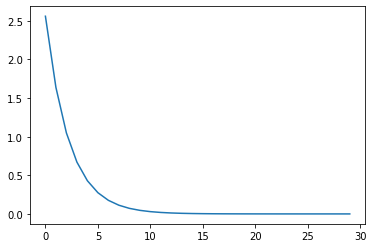

In [ ]:
# Loss function L(w) = w*w
w = 2
L = []
step = 0.1
epochs = 30

for i in range (epochs):
  w = w - step * 2 * w
  L.append(w * w)

plt.plot(L)
print ("final value of L=", L[-1], ", W=", w)

In [ ]:
L

[2.5600000000000005,
 1.6384,
 1.048576,
 0.67108864,
 0.42949672960000007,
 0.2748779069440001,
 0.17592186044416008,
 0.11258999068426244,
 0.07205759403792797,
 0.046116860184273904,
 0.029514790517935298,
 0.018889465931478586,
 0.012089258196146296,
 0.007737125245533629,
 0.0049517601571415215,
 0.003169126500570574,
 0.0020282409603651673,
 0.001298074214633707,
 0.0008307674973655726,
 0.0005316911983139664,
 0.00034028236692093853,
 0.00021778071482940063,
 0.00013937965749081642,
 8.920298079412252e-05,
 5.7089907708238416e-05,
 3.653754093327259e-05,
 2.3384026197294458e-05,
 1.4965776766268452e-05,
 9.578097130411809e-06,
 6.129982163463559e-06]

# Gradient descent step by step

In [2]:
X = [1.0, 2.0, 3.0]
y = [1.2, 1.8, 3.4]

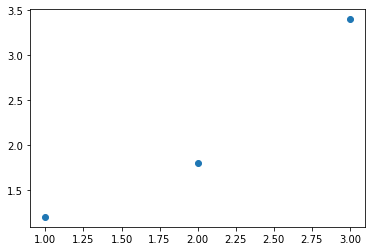

In [3]:
plt.scatter(X,y)

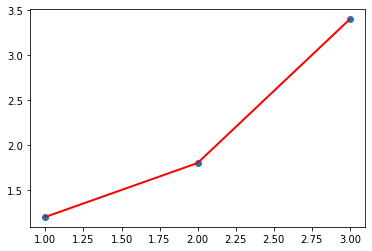

In [4]:
plt.scatter(X,y)
plt.plot(X[:3], y[:3], 'r-', lw=2)

No straight line passes through the three points. We must therefore find the line (equation y = ax + b) which passes the closest to the three points. It is a linear regression.

We will use the mean squared error (MSE) to calculate the error: [Cf. wikipédia](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ddb65cf6e65292f15ae3f64e0048a00eaaf72db)

Random initialization of a and b:

In [5]:
a = 1
b = 0

Gradient descent implementation:

In [17]:
def gradient_descent(_X, _y, _learningrate=0.06, _epochs=5):
    trace = pd.DataFrame(columns=['a', 'b', 'mse'])
    X = np.array(_X)
    y = np.array(_y)
    a, b = 0.2, 0.5 
    iter_a, iter_b, mse = [], [], []
    N = len(X) 
    
    for i in range(_epochs):
        delta = y - (a*X + b)
        
        # Updating a and b
        a = a -_learningrate * (-2 * X.dot(delta).sum() / N)
        b = b -_learningrate * (-2 * delta.sum() / N)

        trace = trace.append(pd.DataFrame(data=[[a, b, mean_squared_error(y, (a*X + b))]], 
                                          columns=['a', 'b', 'mse'], 
                                          index=['epoch ' + str(i+1)]))

    return a, b, trace

Simple function to visualize results

In [18]:
def displayResult(_a, _b, _trace):
  plt.figure( figsize=(30,5))

  plt.subplot(1, 4, 1)
  plt.grid(True)
  plt.title("Distribution & line result")
  plt.scatter(X,y)
  plt.plot([X[0], X[2]], [_a * X[0] + _b, _a * X[2] + _b], 'r-', lw=2)

  plt.subplot(1, 4, 2)
  plt.title("Iterations (Coeff. a) per epochs")
  plt.plot(_trace['a'])

  plt.subplot(1, 4, 3)
  plt.title("Iterations (Coeff. b) per epochs")
  plt.plot(_trace['b'])

  plt.subplot(1, 4, 4)
  plt.title("MSE")
  plt.plot(_trace['mse'])

  print (_trace)

                a         b       mse
epoch 1  0.568000  0.648000  0.366272
epoch 2  0.694400  0.689920  0.168212
epoch 3  0.739955  0.696474  0.143830


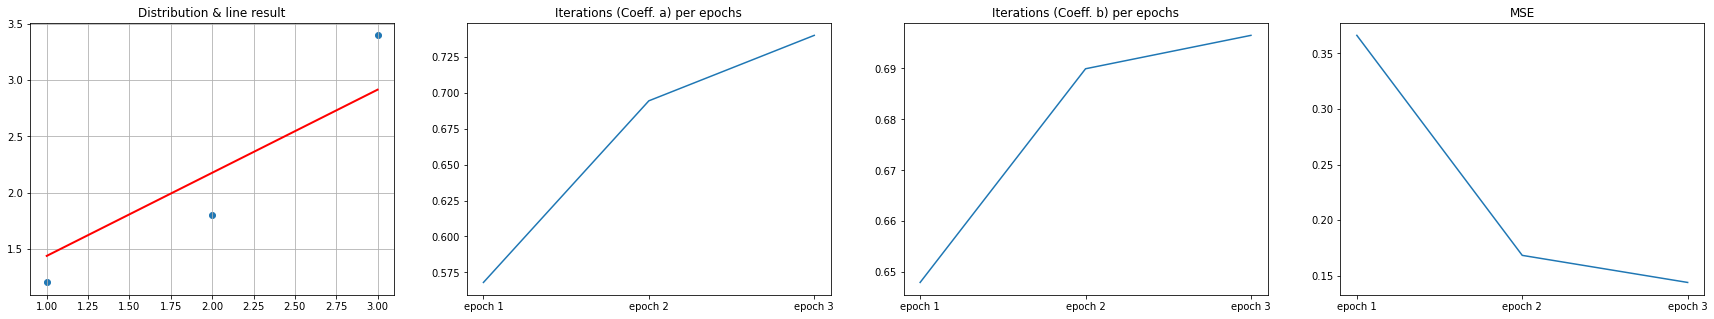

In [19]:
a, b, trace = gradient_descent(X, y, _epochs=3)
displayResult(a, b, trace)

                 a         b       mse
epoch 1   0.568000  0.648000  0.366272
epoch 2   0.694400  0.689920  0.168212
epoch 3   0.739955  0.696474  0.143830
epoch 4   0.758427  0.691308  0.138936
epoch 5   0.767794  0.682328  0.136284
epoch 6   0.774071  0.672178  0.133942
epoch 7   0.779268  0.661740  0.131694
epoch 8   0.784060  0.651307  0.129513
epoch 9   0.788673  0.640975  0.127395
epoch 10  0.793182  0.630777  0.125337


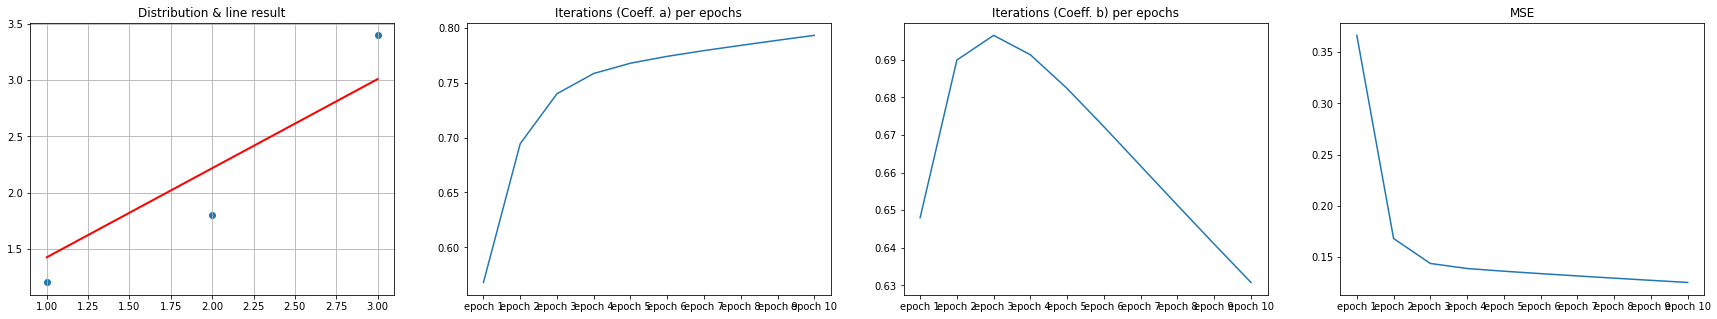

In [20]:
a, b, trace = gradient_descent(X, y, _epochs=10)
displayResult(a, b, trace)

                 a         b       mse
epoch 1   0.580000  0.579333  0.391058
epoch 2   0.693467  0.618733  0.182034
epoch 3   0.746102  0.631500  0.139144
epoch 4   0.771621  0.632463  0.129239
epoch 5   0.785039  0.628226  0.125910
epoch 6   0.793042  0.621729  0.123918
epoch 7   0.798610  0.614281  0.122223
epoch 8   0.803069  0.606464  0.120618
epoch 9   0.807011  0.598537  0.119061
epoch 10  0.810698  0.590615  0.117543
epoch 11  0.814250  0.582747  0.116061
epoch 12  0.817717  0.574956  0.114616
epoch 13  0.821125  0.567250  0.113204
epoch 14  0.824483  0.559633  0.111827
epoch 15  0.827798  0.552107  0.110482
epoch 16  0.831071  0.544670  0.109170
epoch 17  0.834304  0.537322  0.107889
epoch 18  0.837498  0.530062  0.106638
epoch 19  0.840653  0.522890  0.105418
epoch 20  0.843770  0.515804  0.104226
epoch 21  0.846850  0.508803  0.103063
epoch 22  0.849893  0.501886  0.101928
epoch 23  0.852899  0.495052  0.100820
epoch 24  0.855869  0.488300  0.099738
epoch 25  0.858803  0.481

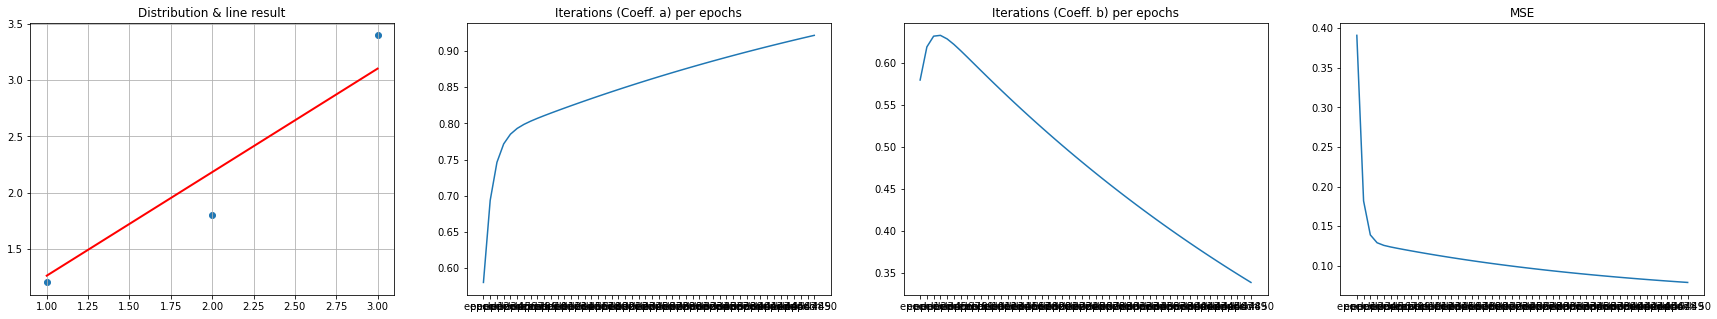

In [ ]:
a, b, trace = gradient_descent(X, y, _epochs=50)
displayResult(a, b, trace)